# Wie wirkt Wiki? 
## Auswirkungen von Verlinkungen im Wikiversum auf die Nutzung lokaler Repositorien

"Wie wirken sich bibliothekarische Arbeiten im Wikiversum auf die Nutzung des eigenen Bestandes aus?", ist eine berechtigte Frage, um zu belegen, ob und wie sich das Engagement von BibliothekarInnen für freies Wissen in Wikipedia, Wikidata, Wikimedia Commons, Wikisource und all den vielen Wiki-Geschwisterplattformen auch quantitativ an der Nutzung eigener Bestände belegen lässt. Aktionen wie #1Lib1Ref, die bereits über viele Jahre dazu aufrufen, zusätzliche Belegestelle für Wikipediartikel aus dem eigenen (digitalisierten) Quellenmaterial einzuarbeiten.


In [1]:
#!pip install python-dotenv 
import requests
import json
from datetime import datetime
from dateutil import rrule
from dotenv import load_dotenv
import os
load_dotenv()

# Erstelle im selben Verzeichnis in dem das Skript ausgeführt wird eine Datei `.env`
# und ergänze dort folgende Parameter mit individuellen Adressen und Keys damit das Skript arbeitet:
#
# MATOMO_ACCESS_TOKEN= {YOUR_MATOMO_API_TOKEN}
# MATOMO_BASE_URL= {YOUR_MATOMO_URL}
# MATOMO_SITE_ID= {YOUR_MATOMO_SITEID}

True

In [2]:
# Funktion `getReferrers()` fragt in Matomo nach den Werten aller auf eine Zieleseite eingehenden Kanäle ab. Default auf Monatsbasis aggregiert
def getReferrers(date, period="month"):
    params = {"module":"API",
              "format":"JSON",
              "idSite":os.getenv("MATOMO_SITE_ID"),
              "period":period,
              "date":date,
              "method":"Referrers.getAll",
              "expanded":1,
              "token_auth":os.getenv("MATOMO_ACCESS_TOKEN"),
              "filter_limit":-1
             }
    response = requests.get(url=os.getenv("MATOMO_BASE_URL"),params=params)
    return response.json()

import src.getWikiRefs as getWikiRefs
listOfWikiUrls = getWikiRefs.getWikiUrlReferer()

In [4]:
# Start- und Enddatum des Betrachtungszeitraums
start_date = datetime(2022, 5, 1)
end_date = datetime(2024, 10, 1)

#print(listOfWikiUrls)
result = []
#Iteration durch den Betrachtzungszeitraum in Monatsschritten
for dt in rrule.rrule(rrule.MONTHLY, dtstart=start_date, until=end_date):
    resultSet = {}
    monthDate = dt.strftime('%Y-%m-%d')
    monthVisit = [monthDate,0,0,0,0,0,0]
    columns = ['Date', 'visit_Wiki', 'visit_Web', 'visit_Sum', 'action_Wiki', 'action_Web', 'action_Sum']    
    print(f"::get Referrer Statistics for {monthDate}")
    refs = getReferrers(monthDate)
    for ref in refs:
        #print(ref)
        if ref["referer_type"]==3:
            if ref["label"] in listOfWikiUrls:
                print(f'{ref["label"]}: is part of WikiVerse')
                monthVisit[1] += ref["nb_visits"]
                monthVisit[4] += ref["nb_actions"]
            else:
                #print(ref["label"])
                monthVisit[2] += ref["nb_visits"]
                monthVisit[5] += ref["nb_actions"]
            monthVisit[3] += ref["nb_visits"]
            monthVisit[6] += ref["nb_actions"]
    result.append(monthVisit)
    print(f"::Sum of Visits in {monthDate}: {monthVisit}")
    #break

::get Referrer Statistics for 2022-05-01
de.wikisource.org: is part of WikiVerse
::Sum of Visits in 2022-05-01: ['2022-05-01', 1, 246, 247, 1, 2064, 2065]
::get Referrer Statistics for 2022-06-01
de.wikiversity.org: is part of WikiVerse
::Sum of Visits in 2022-06-01: ['2022-06-01', 1, 70, 71, 1, 495, 496]
::get Referrer Statistics for 2022-07-01
commons.wikimedia.org: is part of WikiVerse
de.wikisource.org: is part of WikiVerse
::Sum of Visits in 2022-07-01: ['2022-07-01', 8, 89, 97, 186, 2842, 3028]
::get Referrer Statistics for 2022-08-01
commons.wikimedia.org: is part of WikiVerse
::Sum of Visits in 2022-08-01: ['2022-08-01', 13, 24, 37, 65, 754, 819]
::get Referrer Statistics for 2022-09-01
commons.wikimedia.org: is part of WikiVerse
::Sum of Visits in 2022-09-01: ['2022-09-01', 1, 13, 14, 1, 69, 70]
::get Referrer Statistics for 2022-10-01
::Sum of Visits in 2022-10-01: ['2022-10-01', 0, 21, 21, 0, 211, 211]
::get Referrer Statistics for 2022-11-01
de.wikisource.org: is part of Wi

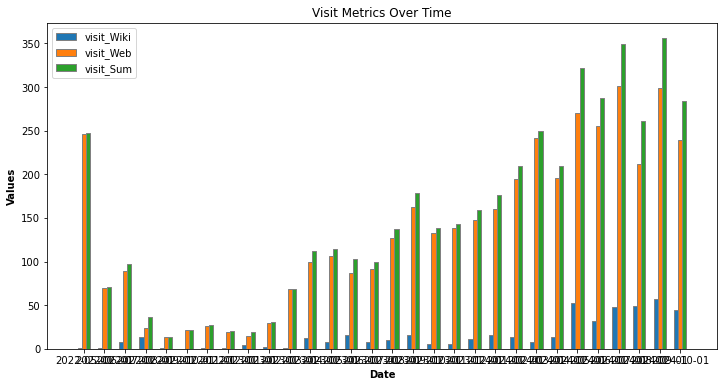

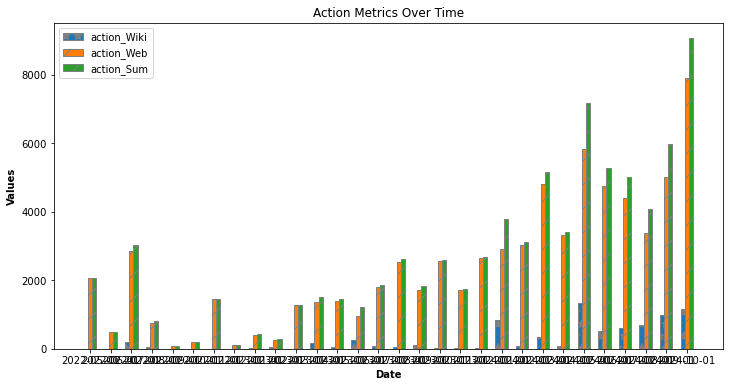

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = result

# Define the columns
columns = ['Date', 'visit_Wiki', 'visit_Web', 'visit_Sum', 'action_Wiki', 'action_Web', 'action_Sum'] 

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Define colors for groups
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Color for Wiki, Web, Sum

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis for visit_* columns
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Positions of the bars on the x-axis for action_* columns
r4 = range(len(df))
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Plotting visit_* columns
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(r1, df['visit_Wiki'], color=colors[0], width=bar_width, edgecolor='grey', label='visit_Wiki')
ax1.bar(r2, df['visit_Web'], color=colors[1], width=bar_width, edgecolor='grey', label='visit_Web')
ax1.bar(r3, df['visit_Sum'], color=colors[2], width=bar_width, edgecolor='grey', label='visit_Sum')

# Adding labels
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Values', fontweight='bold')
ax1.set_title('Visit Metrics Over Time')

# Adding xticks
ax1.set_xticks([r + bar_width for r in range(len(df))])
ax1.set_xticklabels(df['Date'])

# Create legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys())

# Plotting action_* columns
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.bar(r4, df['action_Wiki'], color=colors[0], width=bar_width, edgecolor='grey', label='action_Wiki', hatch='*')
ax2.bar(r5, df['action_Web'], color=colors[1], width=bar_width, edgecolor='grey', label='action_Web', hatch='/')
ax2.bar(r6, df['action_Sum'], color=colors[2], width=bar_width, edgecolor='grey', label='action_Sum', hatch='/')

# Adding labels
ax2.set_xlabel('Date', fontweight='bold')
ax2.set_ylabel('Values', fontweight='bold')
ax2.set_title('Action Metrics Over Time')

# Adding xticks
ax2.set_xticks([r + bar_width for r in range(len(df))])
ax2.set_xticklabels(df['Date'])

# Create legend
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys())

# Show the plots
plt.show()
